<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory data Analysis)
- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적 분석을 통해 데이터를 직관적으로 이해
- 데이터 자체가 가지고 있는 그대로의 의미를 파악
- 데이터 수집 의사결정 기준 / 데이터에 맞는 모델 선정하고자 함 / 변수들 간 관계 파악 /

  
## 순서
- 데이터 가져오기 (모듈 세팅)
- 데이터 정보 확인
- 데이터 전처리 (결측치 이상치 등)
- 데이터 시각화

#### 데이터 가져오기 - 모듈 세팅

In [ ]:
import pandas as pd
df = pd.read_excel('outlier.xlsx')
df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [ ]:
df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [ ]:
df.set_index('번호',inplace=True)

In [ ]:
df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [ ]:
df['국어'] = df['국어'].replace(-57,57)
df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


### 이상치 확인하기

- 이상치(outlier) : 데이터가 가지고 있어야하는 범주를 뛰어넘음 (Ex. 시험점수의 범주는 0~100점)   
사분위에서 특정 범위를 초과하는 경우

데이터 사등분 > Q1,Q2,Q3,Q4 라는 네가지 범위를 만듦   
IQR = 네등분 한 것 중 가운데 50% 값  
+- IQR + 1.5 (하위경계,상위경계)  
이 범위를 벗어나면 이상치라고 판단함

In [ ]:
import matplotlib as plt

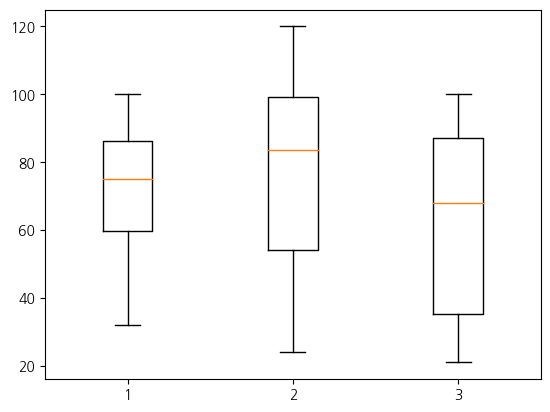

In [ ]:
# 이상치 확인 시각화 - boxplot

import matplotlib.pyplot as plt
plt.boxplot(df)
plt.show()

# 데이터 불러오기

In [ ]:
weather = pd.read_csv('weather.csv',encoding='cp949')

In [ ]:
weather.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [ ]:
weather.shape

(365, 7)

In [ ]:
weather.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [ ]:
weather.set_index('일시',inplace=True)

In [ ]:
weather

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
weather.index = pd.to_datetime(weather.index, format='%Y.%m.%d')
weather

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


## 결측치 확인

In [ ]:
weather.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [ ]:
# Boolean Indexing
weather['최저기온(°C)'][weather['최저기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [ ]:
weather['최고기온(°C)'][weather['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [ ]:
weather['일강수량(mm)'][weather['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [ ]:
weather['최대 순간 풍속(m/s)'][weather['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [ ]:
weather['최대 순간 풍속 풍향(hhmi)'][weather['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [ ]:
# 결측값 확인
# 평균 풍속 : 12/7~14
# 나머지 : 12/8~13

## 결측값 위치 확인 - 날짜

In [ ]:
weather.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


## 결측치 처리하기

In [ ]:
# 비어있는 값의 앞뒤 데이터 살펴보기
# 시간 흐름에 따른 데이터 = 시계열 데이터
# 시계열 데이터 - 비어 있는 값 앞 뒤로 데잍 경향 파악 가능

weather.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


일 강수량의 결측치를 0으로 채워주기

In [ ]:
weather['일강수량(mm)'] = weather['일강수량(mm)'].fillna(0)
weather['일강수량(mm)'].isna().sum()

0

## 기온

In [ ]:
weather.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-10,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-11,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-12,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-13,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
# 사분위값 활용하여 결측값 채우기
weather.loc['2010-12-05':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,5.000000,5.000000,11.0,5.000000,3.000000,5.000000
mean,0.220000,6.760000,0.0,20.960000,6.400000,227.720000
std,2.200454,6.123153,0.0,7.358872,2.910326,137.437648
min,-2.900000,2.000000,0.0,8.400000,3.100000,14.100000
25%,-0.800000,2.000000,0.0,20.600000,5.300000,165.800000
50%,0.400000,2.900000,0.0,24.500000,7.500000,300.800000
75%,1.600000,13.100000,0.0,24.600000,8.050000,317.700000
max,2.800000,13.800000,0.0,26.700000,8.600000,340.200000


In [ ]:
weather.loc['2010-12-05':'2010-12-15','최저기온(°C)'].fillna(0.4,inplace=True)

In [ ]:
weather.loc['2010-12-05':'2010-12-15','최고기온(°C)'].fillna(2.9,inplace=True)

In [ ]:
weather.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-10,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-11,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-12,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-13,0.4,2.9,0.0,NaN,NaN,NaN


In [ ]:
weather.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [ ]:
weather['최대 순간 풍속(m/s)'].fillna(24.1,inplace=True)
weather['최대 순간 풍속(m/s)'].isna().sum()

0

In [ ]:
weather.loc['2010-12-04':'2010-12-18'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,15.000000,15.000000,15.000000,15.000000,7.000000,9.000000
mean,-0.100000,5.333333,0.333333,19.700000,4.642857,223.388889
std,1.520338,4.349494,1.290994,6.676933,2.359984,121.731020
min,-3.200000,1.300000,0.000000,8.300000,2.900000,14.100000
25%,-0.650000,2.900000,0.000000,13.000000,3.250000,165.800000
50%,0.400000,2.900000,0.000000,24.100000,3.400000,284.100000
75%,0.400000,8.100000,0.000000,24.100000,5.550000,300.800000
max,2.800000,13.800000,5.000000,26.700000,8.600000,340.200000


In [ ]:
weather['평균 풍속(m/s)'].fillna(4.64,inplace=True)

In [ ]:
weather['평균 풍속(m/s)'].isnull().sum()

0

In [ ]:
weather.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.10,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.90,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.20,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.90,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.10,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.60,14.1
2010-12-07,0.4,2.0,0.0,20.6,4.64,340.2
2010-12-08,0.4,2.9,0.0,24.1,4.64,NaN
2010-12-09,0.4,2.9,0.0,24.1,4.64,NaN


In [ ]:
weather.loc['2010-12-07':'2010-12-17'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.000000,4.692727,305.380000
std,1.389114,1.475189,1.507557,4.775353,1.037700,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.350000,4.640000,284.100000
50%,0.400000,2.900000,0.000000,24.100000,4.640000,300.800000
75%,0.400000,2.900000,0.000000,24.100000,4.640000,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [ ]:
weather['최대 순간 풍속 풍향(hhmi)'].fillna(305,inplace=True)

In [ ]:
weather['최대 순간 풍속 풍향(hhmi)'].isnull().sum()

0

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


# 데이터 시각화

In [ ]:
# 한글 출력을 위한 추가 라이브러리
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

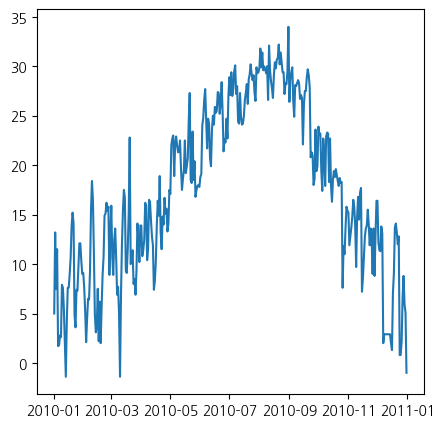

In [ ]:
# 최저기온에 대한 날짜 별 그래프 그리기

x = weather.index # x축에 시간 데이터
y1 = weather['최고기온(°C)'] #y축에 최고기온 정보

plt.figure(figsize=(5,5))
plt.plot(x,y1)
plt.show()

In [ ]:
weather.columns

Index(['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 순간 풍속(m/s)', '평균 풍속(m/s)',
       '최대 순간 풍속 풍향(hhmi)'],
      dtype='object')

In [ ]:
x = weather.index # x축에 시간 데이터
y2 = weather['최고기온(°C)'] #y축 정보
y3 = weather['일강수량(mm)']
y4 = weather['최대 순간 풍속(m/s)']
y5 = weather['평균 풍속(m/s)']
y6 = weather['최대 순간 풍속 풍향(hhmi)']

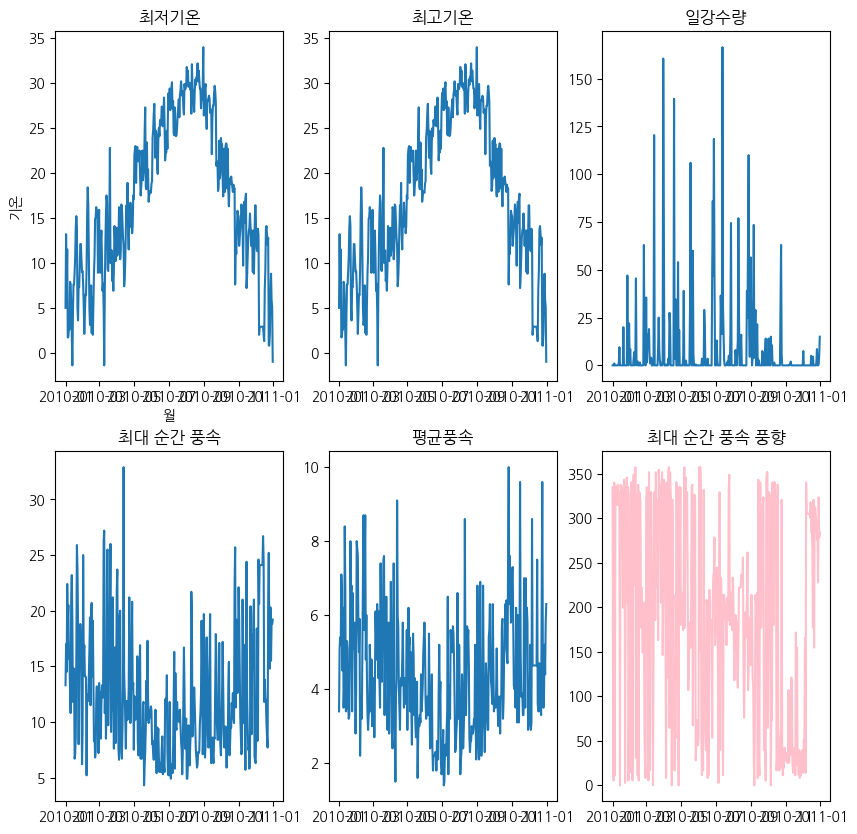

In [ ]:
plt.figure(figsize=(10,10))

# subplot
# plt.subplot(행,열,인덱스)
plt.subplot(2,3,1)
plt.plot(x,y1)
plt.title('최저기온')
plt.xlabel('월')
plt.ylabel('기온')

plt.subplot(2,3,2)
plt.plot(x,y2)
plt.title('최고기온')

plt.subplot(2,3,3)
plt.plot(x,y3)
plt.title('일강수량')

plt.subplot(2,3,4)
plt.plot(x,y4)
plt.title('최대 순간 풍속')

plt.subplot(2,3,5)
plt.plot(x,y5)
plt.title('평균풍속')

plt.subplot(2,3,6)
plt.plot(x,y6,color='pink')
plt.title('최대 순간 풍속 풍향')

plt.show()

### Groupby 활용  월별

In [ ]:
# groupby 를 활용해 월별 데이터 얻기
# DatatimeIndex
weather.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='일시', length=365, freq=None)

In [ ]:
# 인덱스 값을 시리즈 형태로 가져오기
weather_date = pd.Series(weather.index)
weather_date

0     2010-01-01
1     2010-01-02
2     2010-01-03
3     2010-01-04
4     2010-01-05
         ...    
360   2010-12-27
361   2010-12-28
362   2010-12-29
363   2010-12-30
364   2010-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [ ]:
# datetime 데이터 중에서 month 정보 활용하기
weather_date.dt.month
# 인덱스 rangeindex 자동생성됨!!
# 여기서 생성된 인덱스 ==! weather 데이터프레임의 인덱스
# 따라서.values를 통해 값만 넣어야함

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: 일시, Length: 365, dtype: int64

In [ ]:
weather['월']=weather_date.dt.month.values
weather

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [ ]:
# 월별 최저기온의 평균
# 기준이 될 데이터를 groupby(weather['월']) 여기 괄호 안에!
# 특정 컬럼 선택 > ['최저기온(°C)']
weather.groupby(weather['월'])['최저기온(°C)'].mean()

월
1      0.190323
2      2.132143
3      3.048387
4      5.450000
5     11.906452
6     16.816667
7     21.722581
8     23.812903
9     17.960000
10    10.709677
11     3.683333
12     0.348387
Name: 최저기온(°C), dtype: float64

In [ ]:
weather.columns

Index(['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 순간 풍속(m/s)', '평균 풍속(m/s)',
       '최대 순간 풍속 풍향(hhmi)', '월'],
      dtype='object')

In [ ]:
low_temp = weather.groupby(weather['월'] == 1)['최저기온(°C)'].mean()
high_temp = weather.groupby(weather['월'] == 1)['최고기온(°C)'].mean()
rain = weather.groupby(weather['월'] == 1)['일강수량(mm)'].mean()
wind_speed = weather.groupby(weather['월'] == 1)['최대 순간 풍속(m/s)'].mean()
wind_mean = weather.groupby(weather['월'] == 1)['평균 풍속(m/s)'].mean()
wind_dic = weather.groupby(weather['월'] == 1)['최대 순간 풍속 풍향(hhmi)'].mean()

## 월별 데이터 시각화

In [ ]:
weather_date.dt.days('month == 1')

In [ ]:
low_temp = weather.groupby(weather['월'])['최저기온(°C)'].mean()
high_temp = weather.groupby(weather['월'])['최고기온(°C)'].mean()
rain = weather.groupby(weather['월'])['일강수량(mm)'].mean()
wind_speed = weather.groupby(weather['월'])['최대 순간 풍속(m/s)'].mean()
wind_mean = weather.groupby(weather['월'])['평균 풍속(m/s)'].mean()
wind_dic = weather.groupby(weather['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [ ]:
month = weather['월'].unique()
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0.5, 0, '월')

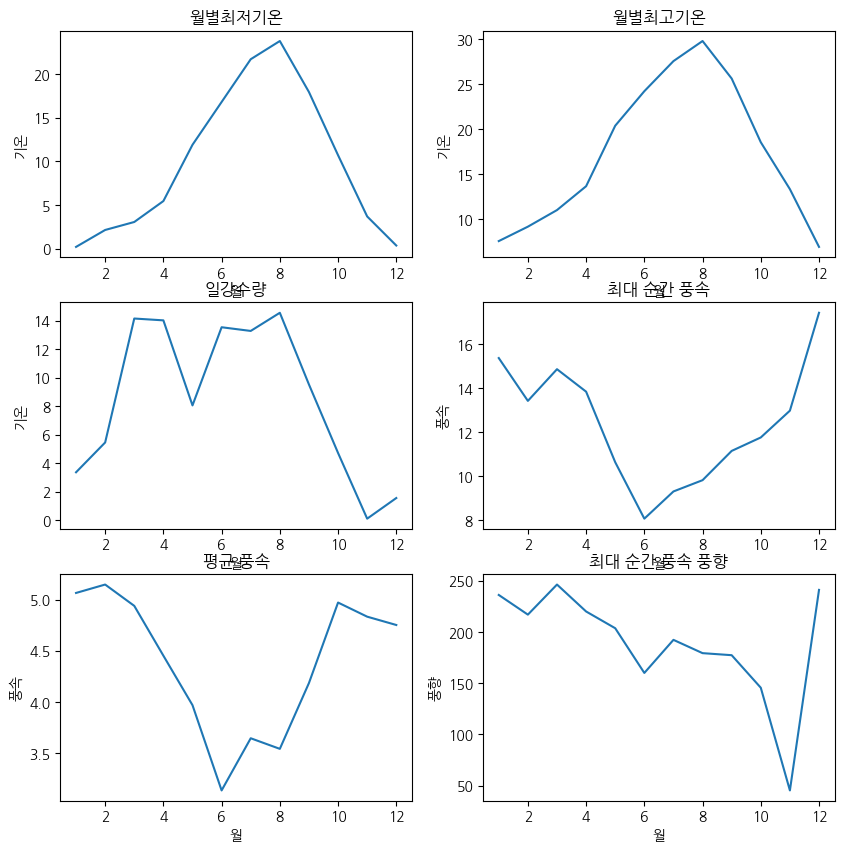

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.title('월별최저기온')
plt.plot(month,low_temp)
plt.ylabel('기온')
plt.xlabel('월')

plt.subplot(3,2,2)
plt.title('월별최고기온')
plt.plot(month,high_temp)
plt.ylabel('기온')
plt.xlabel('월')

plt.subplot(3,2,3)
plt.title('일강수량')
plt.plot(month,rain)
plt.ylabel('기온')
plt.xlabel('월')

plt.subplot(3,2,4)
plt.title('최대 순간 풍속')
plt.plot(month,wind_speed)
plt.ylabel('풍속')
plt.xlabel('월')

plt.subplot(3,2,5)
plt.title('평균 풍속')
plt.plot(month,wind_mean)
plt.ylabel('풍속')
plt.xlabel('월')

plt.subplot(3,2,6)
plt.title('최대 순간 풍속 풍향')
plt.plot(month,wind_dic)
plt.ylabel('풍향')
plt.xlabel('월')



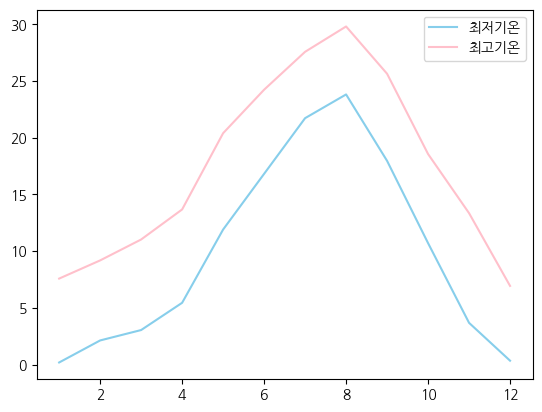

In [ ]:
plt.plot(month,low_temp, color = 'skyblue',label='최저기온')
plt.plot(month,high_temp, color = 'pink',label='최고기온')
plt.legend(loc = 'upper right') #범례 나타내보이기

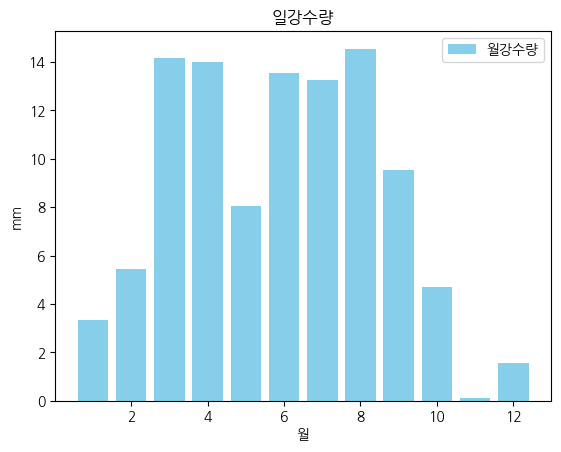

In [ ]:
plt.title('일강수량')
plt.bar(month,rain,color='skyblue',label='월강수량')
plt.ylabel('mm')
plt.xlabel('월')
plt.legend()

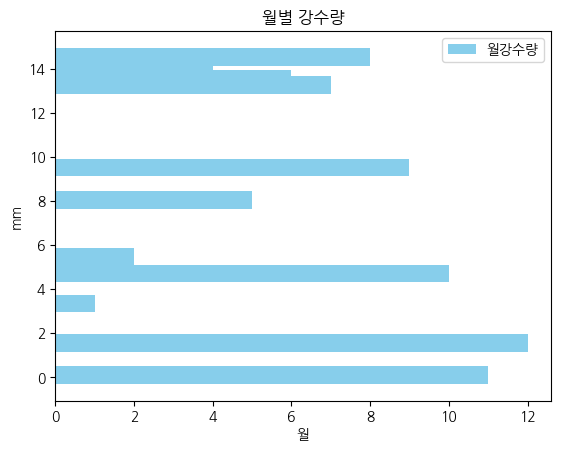

In [ ]:
plt.title('월별 강수량')
plt.barh(rain,month,color='skyblue',label='월강수량')
plt.ylabel('mm')
plt.xlabel('월')
plt.legend()

In [ ]:
jan = weather[weather['월'] == 1]

In [ ]:
jan.columns

Index(['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 순간 풍속(m/s)', '평균 풍속(m/s)',
       '최대 순간 풍속 풍향(hhmi)', '월'],
      dtype='object')

Text(0, 0.5, 'hhmi')

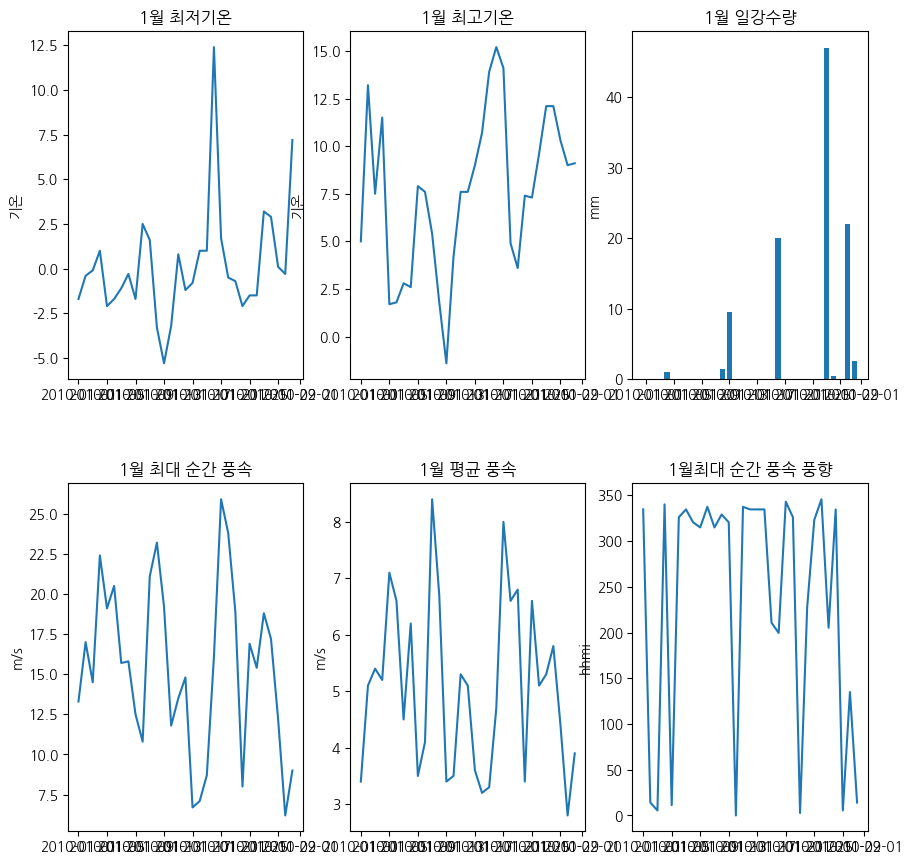

In [ ]:
plt.figure(figsize = (10,10))

# subplot 그래프 간의 간격을 넓히는 옵션
# plt.subplot_adjust(left, bottom, right, top)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

plt.subplot(2,3,1)
plt.plot(jan['최저기온(°C)'])
plt.title('1월 최저기온')
plt.ylabel('기온')

plt.subplot(2,3,2)
plt.plot(jan['최고기온(°C)'])
plt.title('1월 최고기온')
plt.ylabel('기온')


# bar 그래프는 x,y 항상 꼭 넣어줘야 함
plt.subplot(2,3,3)
plt.bar(jan.index,jan['일강수량(mm)'])
plt.title('1월 일강수량')
plt.ylabel('mm')

plt.subplot(2,3,4)
plt.plot(jan['최대 순간 풍속(m/s)'])
plt.title('1월 최대 순간 풍속')
plt.ylabel('m/s')

plt.subplot(2,3,5)
plt.plot(jan['평균 풍속(m/s)'])
plt.title('1월 평균 풍속')
plt.ylabel('m/s')

plt.subplot(2,3,6)
plt.plot(jan['최대 순간 풍속 풍향(hhmi)'])
plt.title('1월최대 순간 풍속 풍향')
plt.ylabel('hhmi')

In [ ]:
jan.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16',
               '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24',
               '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28',
               '2010-01-29', '2010-01-30', '2010-01-31'],
              dtype='datetime64[ns]', name='일시', freq=None)

<BarContainer object of 31 artists>

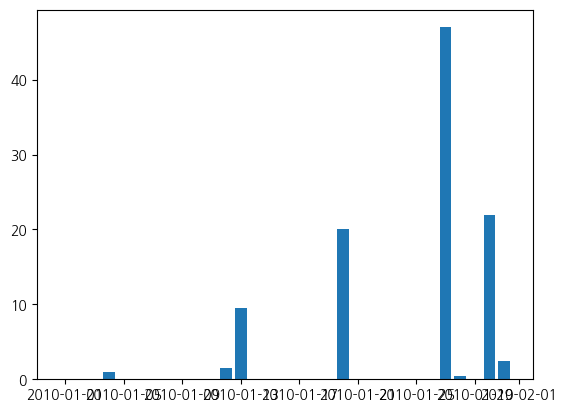

In [ ]:
plt.bar(jan.index,jan['일강수량(mm)'])

In [ ]:
import pandas as pd
df = pd.read_excel('outlier.xlsx')
df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [ ]:
df = df.set_index('번호')

In [ ]:
df['국어'].replace(810,81,inplace=True)

In [ ]:
df['국어'].replace(-57,57,inplace=True)

In [ ]:
df.describe()

,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,71.600000,77.300000,62.00000
std,20.646226,29.616249,29.06315
min,32.000000,24.000000,21.00000
25%,59.750000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,86.250000,99.250000,87.00000
max,100.000000,120.000000,100.00000


In [ ]:
# 문제1. 과목 별 성적 평균
print(df['국어'].mean())
print(df['국어'].min())
print(df['국어'].max())

71.6
32
100


In [ ]:
q1 = df.quantile(0.25)
q1

국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64

In [ ]:
q2 = df.quantile(0.5)
q2

국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64

In [ ]:
q3 = df.quantile(0.75)
q3

국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64

In [ ]:
# IQR 구하기 : 중간 50%에 해당하는 데이터
IQR = q3-q1
IQR

국어    26.50
수학    45.00
영어    51.75
dtype: float64

In [ ]:
# 이상적인 데이터 허용 범위
max_iqr = 1.5*IQR
min_iqr = -1.5*IQR
print(max_iqr,min_iqr)

국어    39.750
수학    67.500
영어    77.625
dtype: float64 국어   -39.750
수학   -67.500
영어   -77.625
dtype: float64


### 시각화

In [ ]:
mean_score = df.mean()

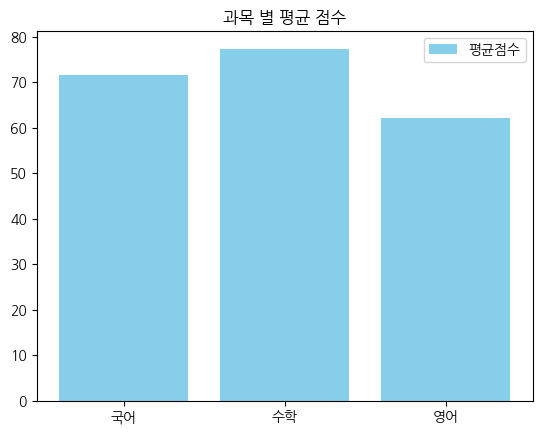

In [ ]:
# 각 과목 별 성적 평균 그래프

mean_score = df.mean()
plt.bar(df.columns,mean_score,color = 'skyblue',label = '평균점수')
plt.title('과목 별 평균 점수')
plt.legend()

In [ ]:
# 이상적인 데이터 허용 범위
max_iqr = 1.5*IQR
min_iqr = -1.5*IQR
print(max_iqr,min_iqr)

# # for문을 순회하며 값을 확인하는 방식도 있음
# if data > max_iqr or < min_iqr:
#   return outlier
# return data

In [ ]:
# def outlier(df):
#   korean = df['국어']
#   if korean > max_iqr or korean < min_iqr :
#     return False
#   return True

# 제주도 음식점 데이터
한국 데이터랩 사이트 출처

In [ ]:
food = pd.read_excel('jeju_food.xlsx')
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [ ]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
food.shape

(500, 8)

In [ ]:
# 결측치 확인
food.isna().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

# 데이터 전처리

In [ ]:
# 광역시도 column 날리기 : 데이터의 크기는 적을수록 이득
food.drop('광역시/도',axis=1,inplace=True)

In [ ]:
food

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [ ]:
food['중분류 카테고리'].unique()

array(['음식'], dtype=object)

In [ ]:
food.drop('중분류 카테고리',axis=1,inplace=True)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [ ]:
food['소분류 카테고리'].unique()

array(['한식', '간이음식', '카페/찻집', '음식점기타', '전문음식', '외국식'], dtype=object)

In [ ]:
# unique 항목이 각각 몇개씩 있는지 알 수 있음
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [ ]:
# 검색량이 많은 (=인기 많은) 식당은 제주시가 서귀포시보다 더 많
food['시/군/구'].value_counts()

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

In [ ]:
food = food.set_index('순위')

In [ ]:
filt = food['소분류 카테고리'] == '한식'
k_food = food[filt]

In [ ]:
# 특정 컬럼만 출력 > 시리즈로 출력
food['소분류 카테고리'][food['소분류 카테고리'] == '한식']

순위
1      한식
4      한식
8      한식
11     한식
12     한식
       ..
488    한식
493    한식
495    한식
498    한식
500    한식
Name: 소분류 카테고리, Length: 210, dtype: object

In [ ]:
# 전체 컬럼 출력 > df 형태로 나옴
food[food['소분류 카테고리'] == '한식']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [ ]:
k_food.shape

(210, 5)

In [ ]:
k_food[:10]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [ ]:
# 소분류가 카페/찻집인 food
food['소분류 카테고리'][food['소분류 카테고리'] == '카페/찻집']

순위
3      카페/찻집
5      카페/찻집
6      카페/찻집
9      카페/찻집
13     카페/찻집
       ...  
468    카페/찻집
483    카페/찻집
484    카페/찻집
491    카페/찻집
499    카페/찻집
Name: 소분류 카테고리, Length: 152, dtype: object

In [ ]:
food[food['소분류 카테고리'] == '카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [ ]:
# .str.contains('스타벅스')

food['관광지명'].str.contains('스타벅스').sum()

23

In [ ]:
starbucks = food[food['관광지명'].str.contains('스타벅스')]

In [ ]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 13 to 363
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   관광지명      23 non-null     object
 1   시/군/구     23 non-null     object
 2   도로명주소     23 non-null     object
 3   소분류 카테고리  23 non-null     object
 4   검색건수      23 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [ ]:
# 국수가게 찾아보기
noodle = k_food[k_food['관광지명'].str.contains('국수')]

### 원그래프

<BarContainer object of 500 artists>

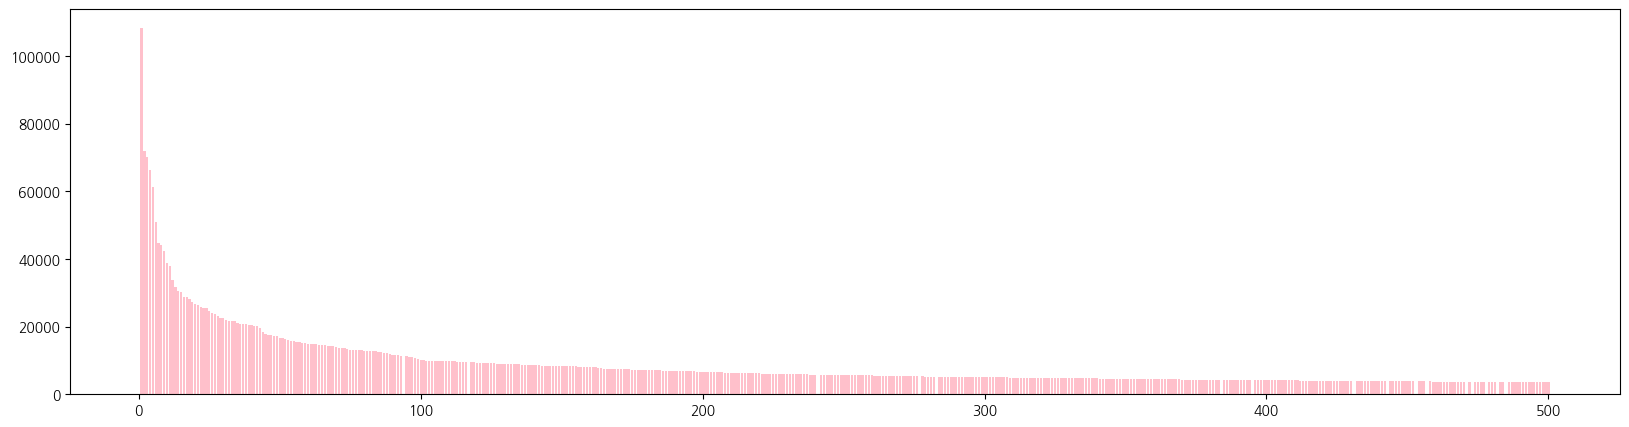

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(food.index,food['검색건수'],color = "pink")

In [ ]:
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

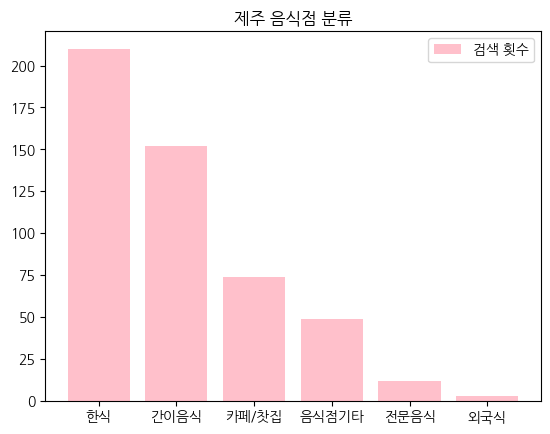

In [ ]:
plt.bar(food['소분류 카테고리'].unique(),food['소분류 카테고리'].value_counts(),color='pink',label='검색 횟수')
plt.title('제주 음식점 분류')
plt.legend()

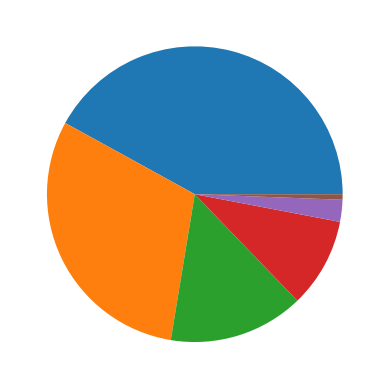

In [ ]:
plt.pie(food['소분류 카테고리'].value_counts())
plt.show()

In [ ]:
pie = food['소분류 카테고리'].value_counts()